In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scienceplots
import os

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [49]:
near_fault = ['San Fernando_77', 'tabas', 'landers', 'northridge_1050', 'northridge_1051', 'Kocaeli_ Turkey_1161',
              'Loma Prieta', 'L_Aquila_ Italy']
far_fault = ['loma_prieta_ff', 'chi_chi_hwa_ff', 'chi_chi_tcu_ff', 'kobe', 'northridge_aci', 'northridge_wba', 'imp_valley_cc', 
             'imp_valley_delta', 'tabas_baj', 'tabas_fer'] 
earthquakes = near_fault + far_fault

Plot PGA vs IDR curve for all earthquakes

In [50]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks.csv')
        df = pd.read_csv(path)
        idr.append(df['idr'].values[0])
    idrs[eq] = idr
idr_df = pd.DataFrame(idrs)

In [51]:
idr_df

,San Fernando_77,tabas,landers,northridge_1050,northridge_1051,Kocaeli_ Turkey_1161,Loma Prieta,L_Aquila_ Italy,loma_prieta_ff,chi_chi_hwa_ff,chi_chi_tcu_ff,kobe,northridge_aci,northridge_wba,imp_valley_cc,imp_valley_delta,tabas_baj,tabas_fer
0,0.029851,0.046093,0.027850,0.034019,0.030882,0.038395,0.042142,0.041418,0.051580,0.046713,0.052730,0.058882,0.044780,0.051096,0.056467,0.021473,0.036262,0.051513
1,0.059373,0.067913,0.054429,0.059384,0.059106,0.070158,0.084629,0.067899,0.073160,0.066689,0.077516,0.089699,0.078637,0.087429,0.095125,0.042850,0.071285,0.080262
2,0.081208,0.091735,0.071880,0.070415,0.065463,0.080645,0.100051,0.085386,0.076184,0.086961,0.101724,0.109380,0.094913,0.107359,0.129185,0.061588,0.106072,0.099926
3,0.094324,0.114371,0.084354,0.079798,0.082964,0.090302,0.105858,0.102815,0.098523,0.095732,0.116485,0.120889,0.117147,0.114331,0.147804,0.069209,0.118519,0.126419
4,0.106321,0.133346,0.089768,0.092087,0.111788,0.100589,0.116476,0.114554,0.115669,0.130843,0.131314,0.135565,0.137167,0.118520,0.147008,0.072235,0.128723,0.145288
5,0.113320,0.144864,0.092630,0.101001,0.126355,0.105273,0.126938,0.133532,0.116579,0.148611,0.140805,0.144867,0.148470,0.119557,0.148523,0.072266,0.136629,0.149321
6,0.117537,0.154166,0.106059,0.103160,0.132353,0.115919,0.135927,0.144864,0.103347,0.154396,0.143361,0.154406,0.151892,0.121357,0.133322,0.077848,0.140575,0.136583
7,0.128205,0.160637,0.127510,0.101575,0.135008,0.132807,0.145802,0.143928,0.112647,0.186982,0.145555,0.166009,0.149798,0.128645,0.153454,0.087615,0.144177,0.140161
8,0.142193,0.170760,0.146849,0.101117,0.139607,0.132661,0.158050,0.144014,0.120588,0.220319,0.159277,0.181662,0.153179,0.162505,0.156796,0.094324,0.145541,0.144978
9,0.146948,0.163902,0.166439,0.098748,0.143032,0.135689,0.172051,0.149035,0.127948,0.253583,0.169673,0.194123,0.167588,0.191815,0.150330,0.096533,0.146386,0.154704


In [52]:
df

,idr,acc,psd
0,0.154704,4.738287,0.070767


In [53]:
df = idr_df.filter(items = near_fault, axis = 1)
narr = df.to_numpy()


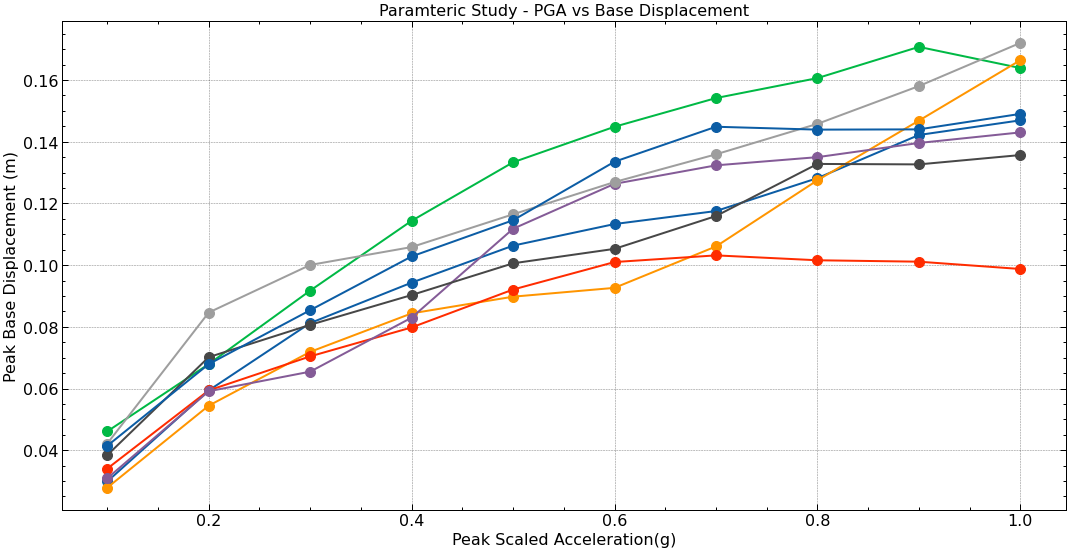

In [54]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1, 1.1, 0.1).round(1), narr, 'o-', ms = 10.0)
ax.set_xlabel('Peak Scaled Acceleration(g)')
ax.set_ylabel('Peak Base Displacement (m)')
plt.title('Paramteric Study - PGA vs Base Displacement')
plt.show()

In [55]:
df = idr_df.filter(items = far_fault, axis = 1)
farr = df.to_numpy()

In [56]:
df

,loma_prieta_ff,chi_chi_hwa_ff,chi_chi_tcu_ff,kobe,northridge_aci,northridge_wba,imp_valley_cc,imp_valley_delta,tabas_baj,tabas_fer
0,0.051580,0.046713,0.052730,0.058882,0.044780,0.051096,0.056467,0.021473,0.036262,0.051513
1,0.073160,0.066689,0.077516,0.089699,0.078637,0.087429,0.095125,0.042850,0.071285,0.080262
2,0.076184,0.086961,0.101724,0.109380,0.094913,0.107359,0.129185,0.061588,0.106072,0.099926
3,0.098523,0.095732,0.116485,0.120889,0.117147,0.114331,0.147804,0.069209,0.118519,0.126419
4,0.115669,0.130843,0.131314,0.135565,0.137167,0.118520,0.147008,0.072235,0.128723,0.145288
5,0.116579,0.148611,0.140805,0.144867,0.148470,0.119557,0.148523,0.072266,0.136629,0.149321
6,0.103347,0.154396,0.143361,0.154406,0.151892,0.121357,0.133322,0.077848,0.140575,0.136583
7,0.112647,0.186982,0.145555,0.166009,0.149798,0.128645,0.153454,0.087615,0.144177,0.140161
8,0.120588,0.220319,0.159277,0.181662,0.153179,0.162505,0.156796,0.094324,0.145541,0.144978
9,0.127948,0.253583,0.169673,0.194123,0.167588,0.191815,0.150330,0.096533,0.146386,0.154704


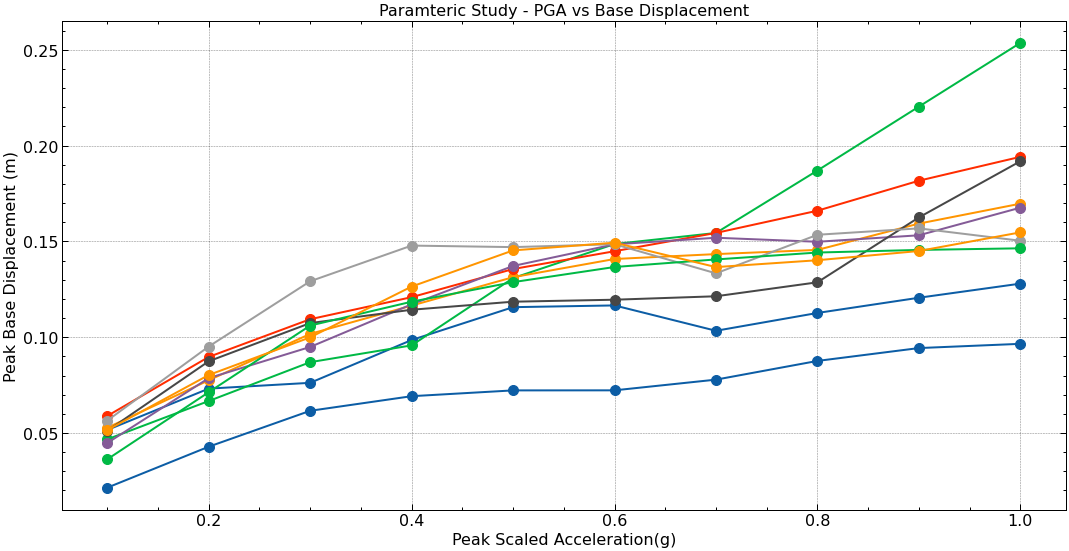

In [57]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1, 1.1, 0.1).round(1), farr, 'o-', ms = 10.0)
ax.set_xlabel('Peak Scaled Acceleration(g)')
ax.set_ylabel('Peak Base Displacement (m)')
plt.title('Paramteric Study - PGA vs Base Displacement')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_7752\1375063144.py:5: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000022ED72A20D0>, <matplotlib.lines.Line2D object at 0x0000022ED72A2E80>, <matplotlib.lines.Line2D object at 0x0000022ED72A21C0>, <matplotlib.lines.Line2D object at 0x0000022ED72A29A0>, <matplotlib.lines.Line2D object at 0x0000022ED6AB9DF0>, <matplotlib.lines.Line2D object at 0x0000022ED7D6D8E0>, <matplotlib.lines.Line2D object at 0x0000022ED7D6D2E0>, <matplotlib.lines.Line2D object at 0x0000022ED7D6D550>, <matplotlib.lines.Line2D object at 0x0000022ED7D6D520>, <matplotlib.lines.Line2D object at 0x0000022ED7D6D4F0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend([h1, h2], ['Far', 'Near'])
C:\Users\acer\AppData\Local\Temp\ipykernel_7752\1375063144.py:5: UserWarning: Legend does not support [<matplotlib.lines.Line2

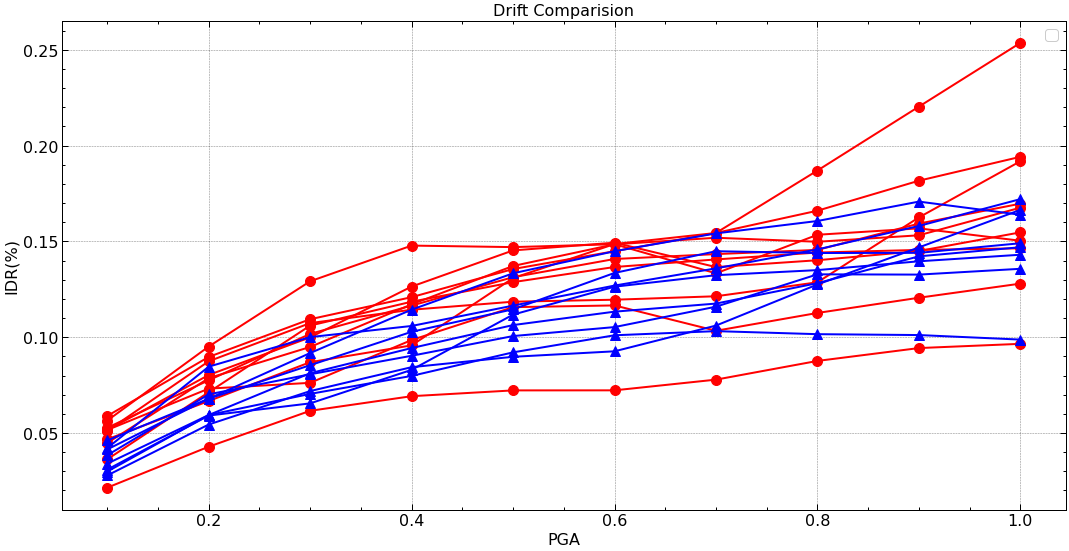

In [58]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1, 1.1, 0.1).round(1), farr, 'o-', ms = 10.0, color = 'red')
h2 = ax.plot(np.arange(0.1, 1.1, 0.1).round(1), narr, '^-', ms = 10.0, color = 'blue')
ax.legend([h1, h2], ['Far', 'Near'])
ax.set_ylabel('IDR(%)')
ax.set_xlabel('PGA')
plt.title('Drift Comparision')
plt.show()

Plot shearwave vs IDR

In [59]:
idrs = {}
for eq in earthquakes:
    idr = []
    for sw in np.arange(100, 550, 50).round(1):
        path = os.path.join(eq, 'shear_wave_velocities', str(sw), 'peaks.csv')
        df = pd.read_csv(path)
        idr.append(df['idr'].values[0])
    idrs[eq] = idr
idr_df = pd.DataFrame(idrs)

In [60]:
idr_df

,San Fernando_77,tabas,landers,northridge_1050,northridge_1051,Kocaeli_ Turkey_1161,Loma Prieta,L_Aquila_ Italy,loma_prieta_ff,chi_chi_hwa_ff,chi_chi_tcu_ff,kobe,northridge_aci,northridge_wba,imp_valley_cc,imp_valley_delta,tabas_baj,tabas_fer
0,0.172208,0.169515,0.109531,0.082703,0.148836,0.079516,0.109332,0.091912,0.053796,0.056079,0.036058,0.025973,0.030149,0.038136,0.082294,0.025400,0.032905,0.048011
1,0.171147,0.173240,0.113963,0.090781,0.155838,0.078341,0.103874,0.110459,0.067854,0.056520,0.046874,0.033489,0.044851,0.058475,0.094505,0.036653,0.043626,0.064961
2,0.171693,0.176836,0.119135,0.092661,0.158060,0.082082,0.102138,0.122262,0.078644,0.060747,0.050952,0.036798,0.056832,0.065011,0.096093,0.047406,0.051070,0.075591
3,0.173426,0.176558,0.129175,0.095445,0.159799,0.085650,0.101316,0.129082,0.083071,0.065048,0.052538,0.037017,0.064840,0.070206,0.094988,0.056943,0.059119,0.078669
4,0.174913,0.177456,0.131366,0.098550,0.163392,0.089148,0.101550,0.131357,0.084328,0.069147,0.053907,0.038075,0.069796,0.075418,0.094381,0.063235,0.065125,0.078985
5,0.177154,0.175788,0.130734,0.099829,0.164760,0.092203,0.101469,0.131297,0.084511,0.072320,0.055509,0.040137,0.074044,0.079214,0.094391,0.066564,0.071439,0.080840
6,0.178075,0.173280,0.128651,0.099628,0.165069,0.094357,0.101295,0.131173,0.084332,0.074464,0.056817,0.041395,0.076220,0.081029,0.094387,0.068170,0.075080,0.081439
7,0.178077,0.170727,0.125497,0.098542,0.164783,0.095275,0.101144,0.130611,0.084121,0.075810,0.057377,0.041770,0.077040,0.082549,0.094472,0.068753,0.077691,0.081504
8,0.177727,0.168445,0.122566,0.097226,0.164168,0.095854,0.101037,0.130268,0.083890,0.076578,0.057317,0.042420,0.077227,0.083097,0.094383,0.068720,0.079619,0.081278


In [61]:
df = idr_df.filter(items = near_fault, axis = 1)
narr = df.to_numpy()

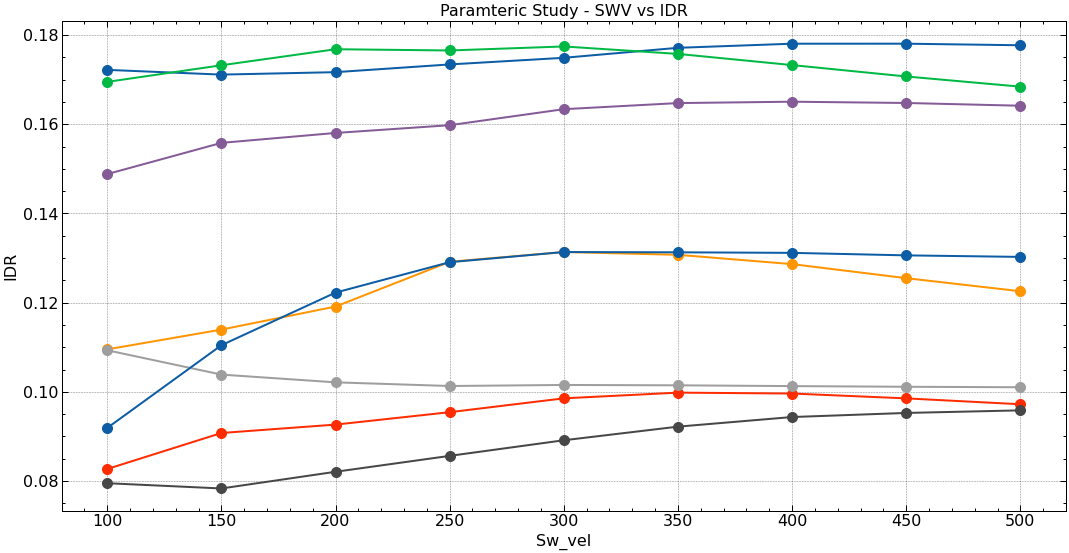

In [62]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(100, 550, 50).round(1), narr, 'o-', ms = 10.0)
ax.set_xlabel('Sw_vel')
ax.set_ylabel('IDR')
plt.title('Paramteric Study - SWV vs IDR')
plt.show()

In [63]:
df = idr_df.filter(items = far_fault, axis = 1)
farr = df.to_numpy()


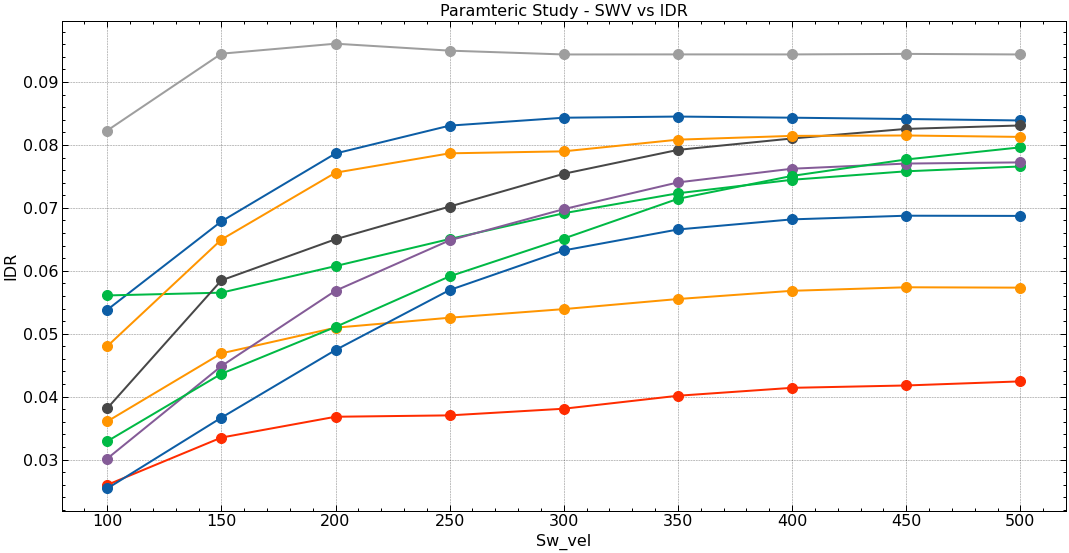

In [64]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(100, 550, 50).round(1), farr, 'o-', ms = 10.0)
ax.set_xlabel('Sw_vel')
ax.set_ylabel('IDR')
plt.title('Paramteric Study - SWV vs IDR')
plt.show()

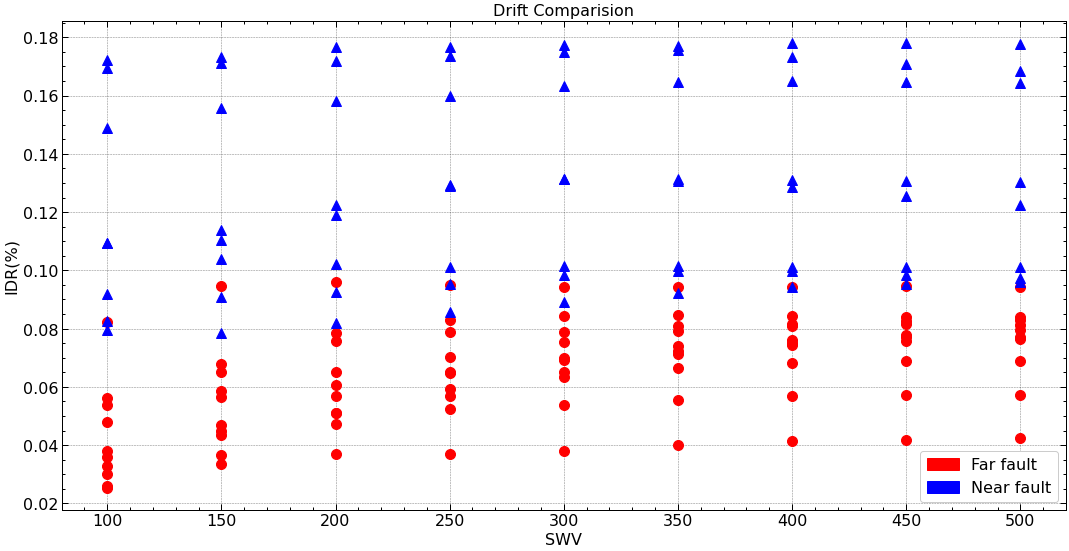

In [65]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(100, 550, 50).round(1), farr, 'o', ms = 10.0, color = 'red', label = 'Far')
h2 = ax.plot(np.arange(100, 550, 50).round(1), narr, '^', ms = 10.0, color = 'blue', label = 'True')
red_patch = mpatches.Patch(color='red', label='Far fault')
blue_patch = mpatches.Patch(color='blue', label='Near fault')
ax.legend(handles=[red_patch, blue_patch])
ax.set_ylabel('IDR(%)')
ax.set_xlabel('SWV')
plt.title('Drift Comparision')
plt.show()

Plot PGA vs IDR with and without SSI

In [116]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks.csv')
        df = pd.read_csv(path)
        idr.append(df['idr'].values[0])
    idrs[eq] = idr
idr_df = pd.DataFrame(idrs)

In [117]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks_no_ssi.csv')
        df = pd.read_csv(path)
        idr.append(df['idr'].values[0])
    idrs[eq] = idr
idr_nossi_df = pd.DataFrame(idrs)

In [118]:
df = idr_df.filter(items = far_fault, axis = 1)
ssi_arr = df.to_numpy()

In [119]:
df = idr_nossi_df.filter(items = far_fault, axis = 1)
nossi_arr = df.to_numpy()

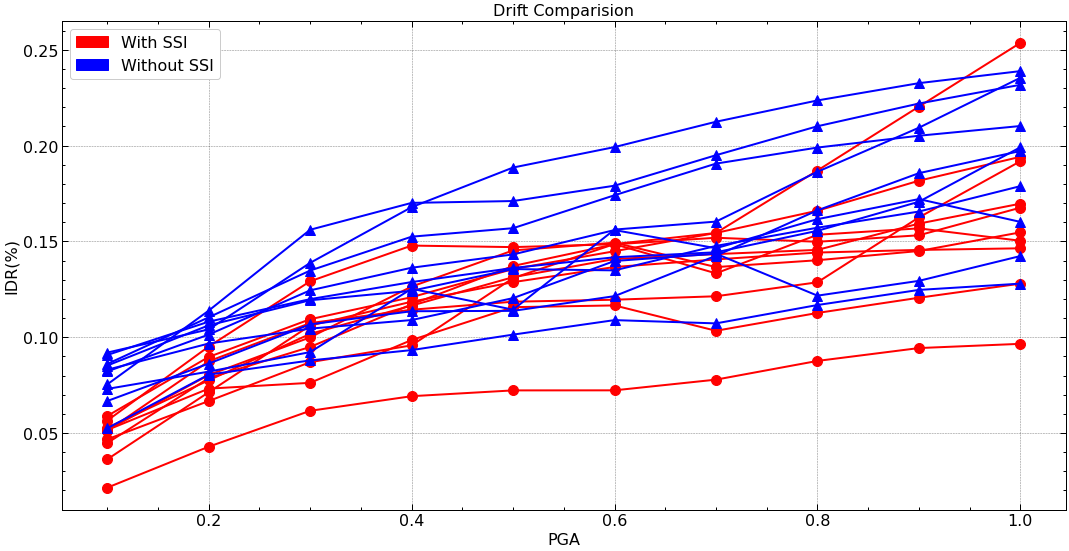

In [120]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), ssi_arr, 'o-', ms = 10.0, color = 'red')
h2 = ax.plot(np.arange(0.1,1.1,0.1).round(1), nossi_arr, '^-', ms = 10.0, color = 'blue')
red_patch = mpatches.Patch(color='red', label='With SSI')
blue_patch = mpatches.Patch(color='blue', label='Without SSI')
ax.legend(handles=[red_patch, blue_patch])
ax.set_ylabel('IDR(%)')
ax.set_xlabel('PGA')
plt.title('Drift Comparision')
plt.show()

In [121]:
df = idr_df.filter(items = near_fault, axis = 1)
ssi_arr = df.to_numpy()

In [122]:
df = idr_nossi_df.filter(items = near_fault, axis = 1)
nossi_arr = df.to_numpy()

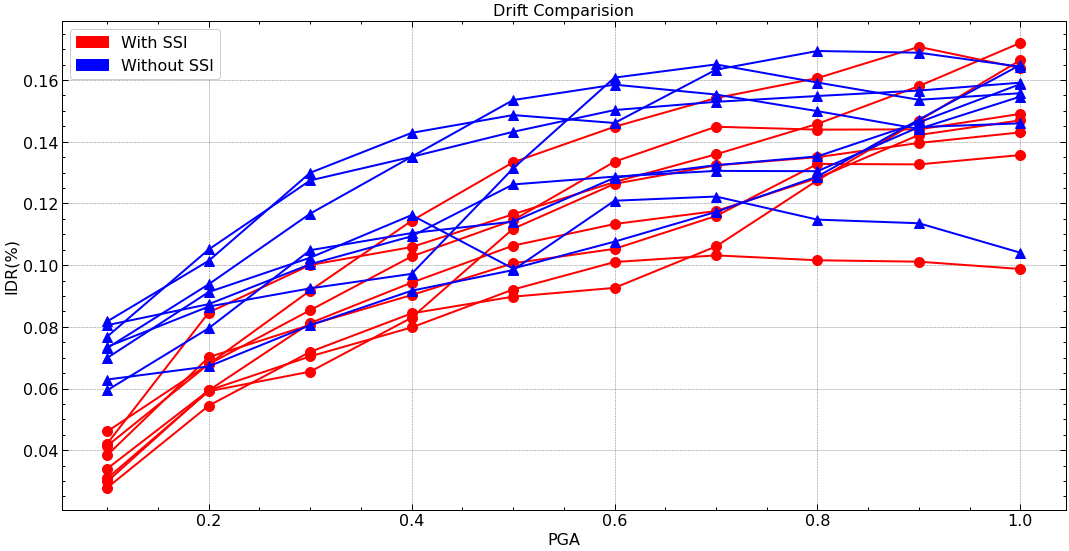

In [123]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), ssi_arr, 'o-', ms = 10.0, color = 'red')
h2 = ax.plot(np.arange(0.1,1.1,0.1).round(1), nossi_arr, '^-', ms = 10.0, color = 'blue')
red_patch = mpatches.Patch(color='red', label='With SSI')
blue_patch = mpatches.Patch(color='blue', label='Without SSI')
ax.legend(handles=[red_patch, blue_patch])
ax.set_ylabel('IDR(%)')
ax.set_xlabel('PGA')
plt.title('Drift Comparision')
plt.show()

Plot average % reduction with and without SSI and compare NF and FF records

In [124]:
idr_df.filter(items = far_fault, axis = 1)

,loma_prieta_ff,chi_chi_hwa_ff,chi_chi_tcu_ff,kobe,northridge_aci,northridge_wba,imp_valley_cc,imp_valley_delta,tabas_baj,tabas_fer
0,0.051580,0.046713,0.052730,0.058882,0.044780,0.051096,0.056467,0.021473,0.036262,0.051513
1,0.073160,0.066689,0.077516,0.089699,0.078637,0.087429,0.095125,0.042850,0.071285,0.080262
2,0.076184,0.086961,0.101724,0.109380,0.094913,0.107359,0.129185,0.061588,0.106072,0.099926
3,0.098523,0.095732,0.116485,0.120889,0.117147,0.114331,0.147804,0.069209,0.118519,0.126419
4,0.115669,0.130843,0.131314,0.135565,0.137167,0.118520,0.147008,0.072235,0.128723,0.145288
5,0.116579,0.148611,0.140805,0.144867,0.148470,0.119557,0.148523,0.072266,0.136629,0.149321
6,0.103347,0.154396,0.143361,0.154406,0.151892,0.121357,0.133322,0.077848,0.140575,0.136583
7,0.112647,0.186982,0.145555,0.166009,0.149798,0.128645,0.153454,0.087615,0.144177,0.140161
8,0.120588,0.220319,0.159277,0.181662,0.153179,0.162505,0.156796,0.094324,0.145541,0.144978
9,0.127948,0.253583,0.169673,0.194123,0.167588,0.191815,0.150330,0.096533,0.146386,0.154704


In [125]:
percent_red_nf = np.absolute(nossi_arr - ssi_arr)/nossi_arr
avg_red_nf = np.average(percent_red_nf, axis = 1)

In [126]:
avg_red_nf

array([0.49303643, 0.26862352, 0.23567712, 0.18825976, 0.14240342,
       0.1394332 , 0.11759638, 0.0799332 , 0.05905564, 0.05150754])

In [127]:
df = idr_df.filter(items = far_fault, axis = 1)
ssi_arr = df.to_numpy()
df = idr_nossi_df.filter(items = far_fault, axis = 1)
nossi_arr = df.to_numpy()

In [128]:
percent_red_ff = np.absolute(nossi_arr - ssi_arr)/nossi_arr
avg_red_ff = np.average(percent_red_ff, axis = 1)

In [131]:
ssi_arr = idr_df.to_numpy()
nossi_arr = idr_nossi_df.to_numpy()
percent_red = np.absolute(nossi_arr - ssi_arr) / nossi_arr * 100.0
avg_red = np.average(percent_red, axis = 1)

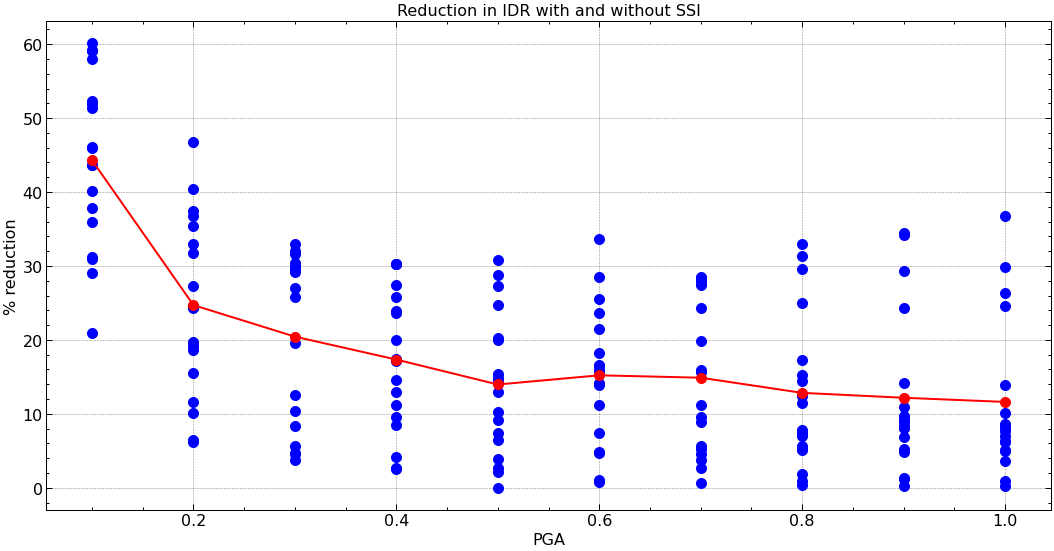

In [134]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), percent_red, 'o', ms = 10.0, color = 'blue')
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), avg_red, 'o-', ms = 10.0, color = 'red')
ax.set_ylabel('% reduction')
ax.set_xlabel('PGA')
plt.title('Reduction in IDR with and without SSI')
plt.savefig('reduction_in_idr.png')
plt.show()

Plot PGA vs PSD with and without SSI

In [135]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks.csv')
        df = pd.read_csv(path)
        idr.append(df['psd'].values[0])
    idrs[eq] = idr
idr_df = pd.DataFrame(idrs)

In [136]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks_no_ssi.csv')
        df = pd.read_csv(path)
        idr.append(df['psd'].values[0])
    idrs[eq] = idr
idr_nossi_df = pd.DataFrame(idrs)

In [137]:
df = idr_df.filter(items = far_fault, axis = 1)
ssi_arr = df.to_numpy()

In [138]:
df = idr_nossi_df.filter(items = far_fault, axis = 1)
nossi_arr = df.to_numpy()

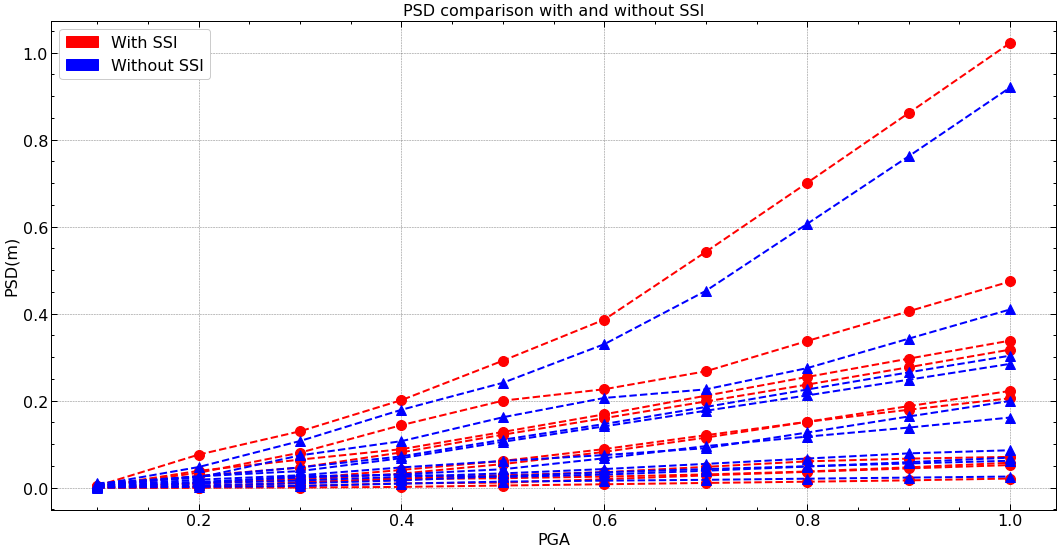

In [140]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), ssi_arr, 'o--', ms = 10.0, color = 'red')
h2 = ax.plot(np.arange(0.1,1.1,0.1).round(1), nossi_arr, '^--', ms = 10.0, color = 'blue')
red_patch = mpatches.Patch(color='red', label='With SSI')
blue_patch = mpatches.Patch(color='blue', label='Without SSI')
ax.legend(handles=[red_patch, blue_patch])
ax.set_ylabel('PSD(m)')
ax.set_xlabel('PGA')
plt.title('PSD comparison with and without SSI')
plt.show()

Plot PGA vs IDR fixed and base isolated

In [144]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks.csv')
        df = pd.read_csv(path)
        idr.append(df['idr'].values[0])
    idrs[eq] = idr
idr_df = pd.DataFrame(idrs)

In [145]:
idrs = {}
for eq in earthquakes:
    idr = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks_fixed_base.csv')
        df = pd.read_csv(path)
        idr.append(df['idr'].values[0])
    idrs[eq] = idr
idr_fix_df = pd.DataFrame(idrs)

In [146]:
idr_fix_df

,San Fernando_77,tabas,landers,northridge_1050,northridge_1051,Kocaeli_ Turkey_1161,Loma Prieta,L_Aquila_ Italy,loma_prieta_ff,chi_chi_hwa_ff,chi_chi_tcu_ff,kobe,northridge_aci,northridge_wba,imp_valley_cc,imp_valley_delta,tabas_baj,tabas_fer
0,0.030037,0.046597,0.028009,0.034240,0.031096,0.038613,0.042590,0.041725,0.052769,0.040281,0.057221,0.061816,0.045004,0.051919,0.054426,0.021589,0.036349,0.052263
1,0.060074,0.093194,0.056017,0.068479,0.062191,0.077225,0.085180,0.083451,0.105539,0.080565,0.114441,0.123631,0.090007,0.103838,0.108852,0.043178,0.072699,0.104523
2,0.090111,0.139791,0.084026,0.102718,0.093286,0.115838,0.127770,0.125176,0.158308,0.120847,0.171661,0.185446,0.135011,0.155756,0.163278,0.064768,0.109047,0.156784
3,0.120148,0.186387,0.112036,0.136956,0.124381,0.154450,0.170359,0.166902,0.211077,0.161129,0.228881,0.247260,0.180014,0.207675,0.217704,0.086357,0.145397,0.209044
4,0.150186,0.232983,0.140044,0.171195,0.155476,0.193062,0.212949,0.208627,0.263846,0.201411,0.286101,0.309075,0.225017,0.259593,0.272129,0.107946,0.181745,0.261305
5,0.180223,0.279580,0.168054,0.205434,0.186571,0.231674,0.255539,0.250352,0.316615,0.241693,0.343321,0.370890,0.270021,0.311511,0.326555,0.129535,0.218094,0.313567
6,0.210260,0.326176,0.196062,0.239673,0.217666,0.270286,0.298128,0.292078,0.369385,0.281976,0.400540,0.432704,0.315024,0.363429,0.380981,0.151125,0.254443,0.365827
7,0.240297,0.372773,0.224071,0.273912,0.248761,0.308899,0.340718,0.333803,0.422154,0.322257,0.457760,0.494519,0.360027,0.415348,0.435407,0.172714,0.290792,0.418087
8,0.270334,0.419369,0.252080,0.308151,0.279856,0.347510,0.383308,0.375529,0.474922,0.362540,0.514980,0.556334,0.405031,0.467266,0.489833,0.194303,0.327141,0.470349
9,0.300371,0.465966,0.280089,0.342390,0.310950,0.386123,0.425898,0.417254,0.527691,0.402822,0.572200,0.618148,0.450034,0.519185,0.544259,0.215893,0.363491,0.522610


In [147]:
df = idr_df.filter(items = near_fault, axis = 1)
ssi_arr = df.to_numpy()

In [148]:
df = idr_fix_df.filter(items = near_fault, axis = 1)
fix_arr = df.to_numpy()

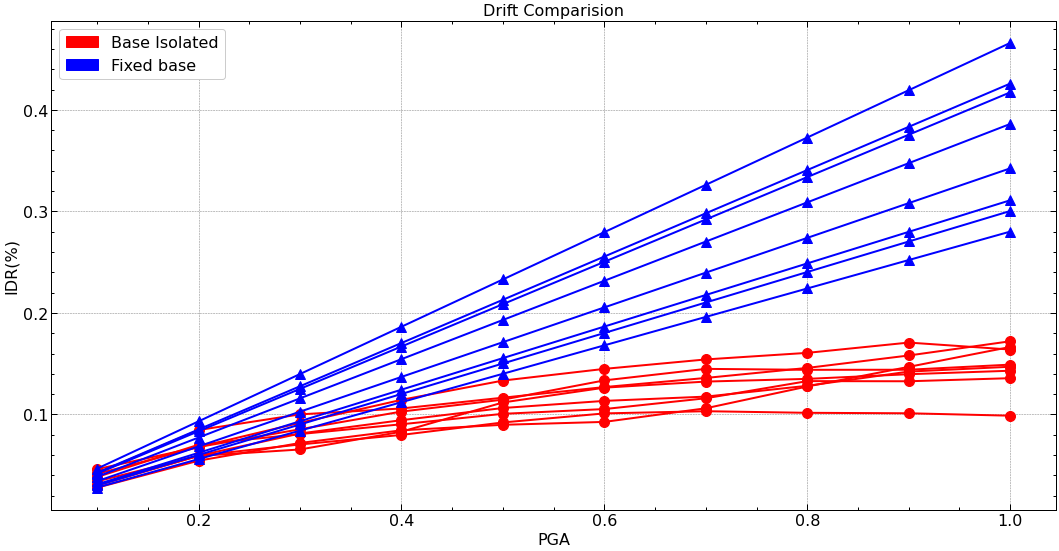

In [149]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), ssi_arr, 'o-', ms = 10.0, color = 'red')
h2 = ax.plot(np.arange(0.1,1.1,0.1).round(1), fix_arr, '^-', ms = 10.0, color = 'blue')
red_patch = mpatches.Patch(color='red', label='Base Isolated')
blue_patch = mpatches.Patch(color='blue', label='Fixed base')
ax.legend(handles=[red_patch, blue_patch])
ax.set_ylabel('IDR(%)')
ax.set_xlabel('PGA')
plt.title('Drift Comparision')
plt.show()

In [150]:
df = idr_df.filter(items = far_fault, axis = 1)
ssi_arr = df.to_numpy()

In [151]:
df = idr_fix_df.filter(items = far_fault, axis = 1)
fix_arr = df.to_numpy()

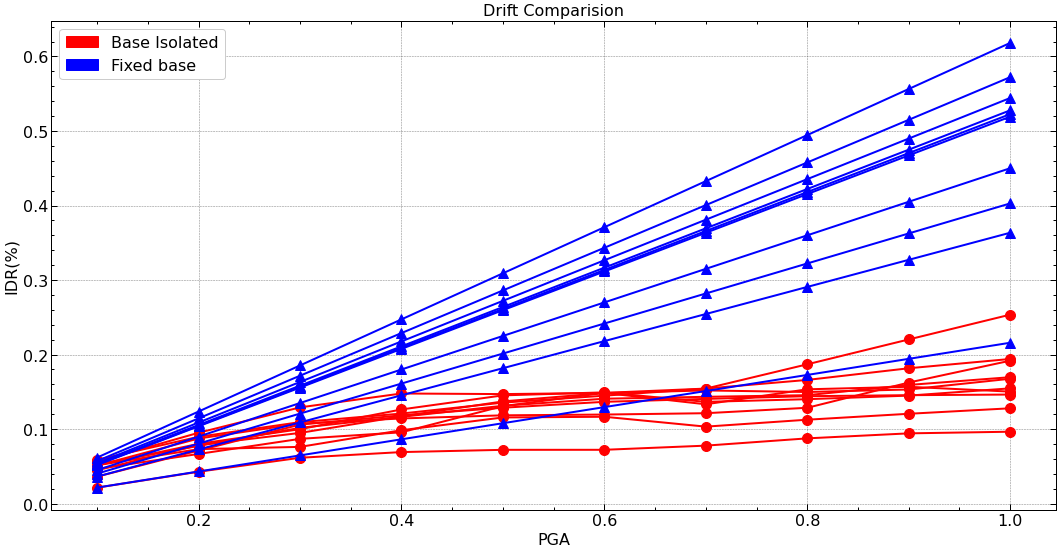

In [152]:
fig = plt.figure(figsize = (18,9))
ax = fig.add_subplot(111)
h1 = ax.plot(np.arange(0.1,1.1,0.1).round(1), ssi_arr, 'o-', ms = 10.0, color = 'red')
h2 = ax.plot(np.arange(0.1,1.1,0.1).round(1), fix_arr, '^-', ms = 10.0, color = 'blue')
red_patch = mpatches.Patch(color='red', label='Base Isolated')
blue_patch = mpatches.Patch(color='blue', label='Fixed base')
ax.legend(handles=[red_patch, blue_patch])
ax.set_ylabel('IDR(%)')
ax.set_xlabel('PGA')
plt.title('Drift Comparision')
plt.show()